In [115]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

In [117]:
for x, y in zip(X, Y):
    print(round(x, 1), round(y, 1))

0.0 -0.7
1.1 1.1
2.2 2.6
3.3 2.7
4.4 3.8
5.6 4.5
6.7 6.3
7.8 8.9
8.9 7.7
10.0 11.1


In [118]:
model = Sequential()
model.add(Dense(input_dim = 1, units=1, activation='linear', use_bias=False))
# input dim 1차원, 모델의 출력이 단순히 y값의 예측값이므로 units = 1 ?? 
# activation 선형, y = wx + b 에서 b가 없는걸 가정할거므로 use bias = False

In [119]:
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer='sgd', loss='mse')

In [120]:
# 학습하기 전에 최초로 설정된 w값은?
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print('initial w is: ',w)
# 그냥 무작위의 작은 값인듯

initial w is:  -0.831728


In [121]:
# 아래의 코드를 실행하여 학습합니다.
# 총 10개의 데이터가 있으므로, batch_size를 10으로 설정하여 batch gradient descent를 실행합니다.
# epochs=10은 총 10번 반복 수행하여 모델을 학습한다는 뜻입니다.
model.fit(X, Y, batch_size=10,epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 117.2490
Epoch 2/10
10/10 [==============================] - 0s 101us/step - loss: 10.9111
Epoch 3/10
10/10 [==============================] - 0s 98us/step - loss: 1.5755
Epoch 4/10
10/10 [==============================] - 0s 201us/step - loss: 0.7560
Epoch 5/10
10/10 [==============================] - 0s 98us/step - loss: 0.6840
Epoch 6/10
10/10 [==============================] - 0s 199us/step - loss: 0.6777
Epoch 7/10
10/10 [==============================] - 0s 199us/step - loss: 0.6771
Epoch 8/10
10/10 [==============================] - 0s 199us/step - loss: 0.6771
Epoch 9/10
10/10 [==============================] - 0s 100us/step - loss: 0.6771
Epoch 10/10
10/10 [==============================] - 0s 198us/step - loss: 0.6771


In [122]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 0.9884538


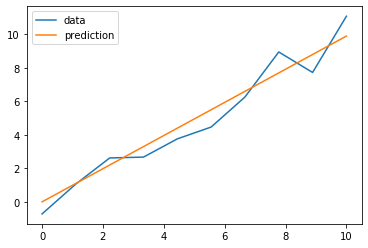

In [123]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()

In [ ]:
# 아 이제야 제대로 되네